# Simple Linear Regression

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data=pd.read_csv(r"E:\PYTHON\python Datasets\Boston1.csv")

In [90]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


we making Simple Linear Regression model so we are taking only one independent variable 

In [91]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


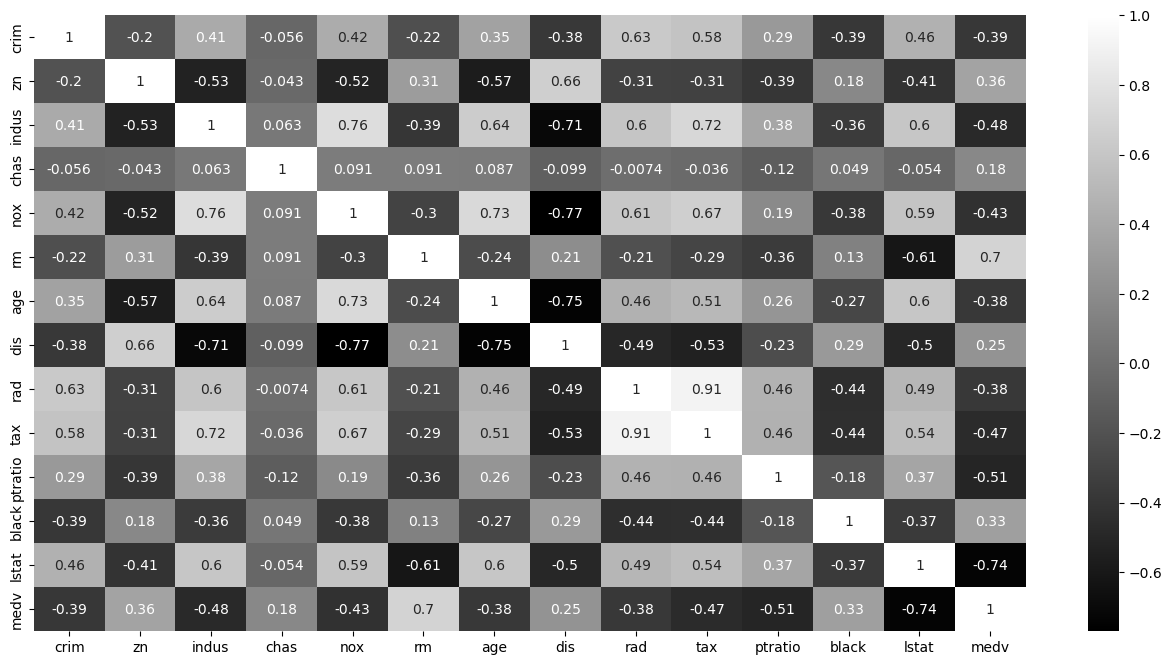

In [92]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap='gray')
plt.show()

In [93]:
data=data[['lstat','medv']]

In [94]:
data.head(2)

,lstat,medv
0,4.98,24.0
1,9.14,21.6


In [95]:
data.shape,data.size

((506, 2), 1012)

### visualisation

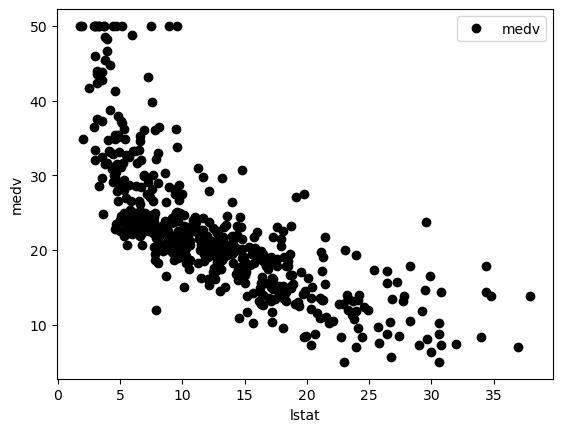

In [96]:
data.plot(x='lstat',y='medv',style='o',c='k')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

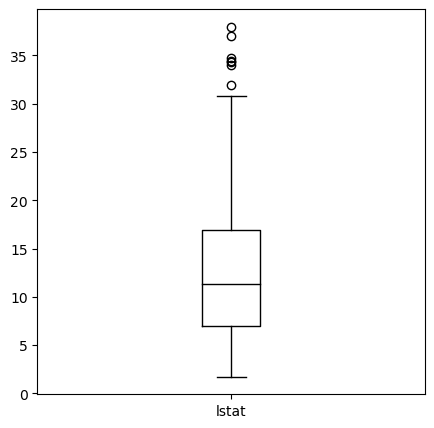

In [97]:
data.lstat.plot(kind='box',figsize=(5,5),color='k')
plt.show()

In [98]:
x=pd.DataFrame(data.lstat)
y=pd.DataFrame(data.medv)

In [99]:
x.size,y.size

(506, 506)

### train test split

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

In [101]:
display(x_train.size,x_test.size,y_train.size,y_test.size)

404

102

404

102

### creating model

In [102]:
from sklearn.linear_model import LinearRegression
housemodel=LinearRegression()

#train our model
housemodel.fit(x_train,y_train)

LinearRegression()

In [103]:
#c=intercept
print(housemodel.intercept_)

[34.80769148]


In [104]:
#slope
print(housemodel.coef_)

[[-0.95827522]]


In [105]:
#predicting
y_pred=housemodel.predict(x_test)

In [106]:
from sklearn import metrics
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,y_pred)}")

Mean Abslote Error : 4.656264954567839
Mean Squared Error : 36.400583644428416
Root Mean Squared Error : 6.033289620466467
R^2 : 0.5292903714389394


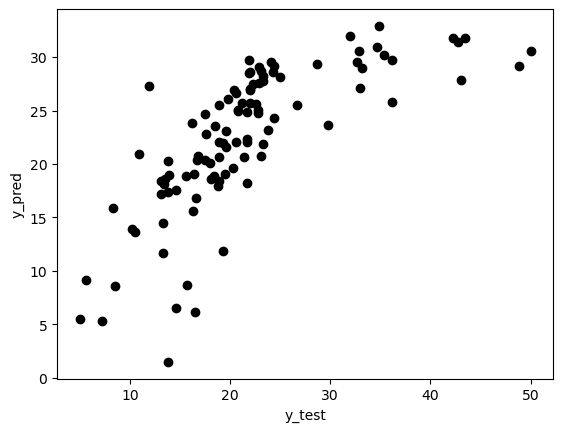

In [107]:
plt.scatter(y_test,y_pred,c='k')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()